In [1]:
using StockFlow

# 1. Define SEIR Stock and Flow model

In [2]:
# define the function of the dynamical variables
f_birth(u,uN,p,t)=p.μ*uN.N(u,t)
f_incid(u,uN,p,t)= p.β*u.S*u.I/uN.N(u,t)
f_inf(u,uN,p,t)=u.E/p.tlatent
f_rec(u,uN,p,t)=u.I/p.trecovery
f_deathS(u,uN,p,t)=u.S*p.δ
f_deathE(u,uN,p,t)=u.E*p.δ
f_deathI(u,uN,p,t)=u.I*p.δ
f_deathR(u,uN,p,t)=u.R*p.δ

f_deathR (generic function with 1 method)

In [3]:
#(stock_name=>(inflows, outflows, variables, svariables))
     ## if a stock has no inflow or no outflow, use keyword ":F_NONE"
     ## if a stock has no variables connect to, use keyword ":V_NONE"
     ## if a stock has no sum_variables connect to, use keyword ":SV_NONE"
#(flow=>variable)
#(variable=>function)
#(svariable=>variable)
     ## if sum_variable contributes to no variables, use keywork ":SVV_NONE"
seir=StockAndFlow(
    (:S=>(:birth,(:incid,:deathS),(:v_incid,:v_deathS),:N),
        :E=>(:incid,(:inf,:deathE),(:v_inf,:v_deathE),:N),
        :I=>(:inf,(:rec,:deathI),(:v_incid, :v_rec,:v_deathI),:N),
        :R=>(:rec,:deathR,:v_deathR,:N)),
    (:birth=>:v_birth,:incid=>:v_incid,:inf=>:v_inf,:rec=>:v_rec,:deathS=>:v_deathS,:deathE=>:v_deathE,:deathI=>:v_deathI,:deathR=>:v_deathR),
    (:v_birth=>f_birth,:v_incid=>f_incid,:v_inf=>f_inf,:v_rec=>f_rec,:v_deathS=>f_deathS,:v_deathE=>f_deathE,:v_deathI=>f_deathI,:v_deathR=>f_deathR),
    (:N=>(:v_birth,:v_inf))
)

StockAndFlow {S:4, SV:1, LS:4, F:8, I:4, O:7, V:8, LV:8, LSV:2, Name:0, FuncDynam:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     E │
│ 3 │     I │
│ 4 │     R │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
│  4 │   4 │    1 │
└────┴─────┴──────┘
┌───┬────┬────────┐
│ F │ fv │  fname │
├───┼────┼────────┤
│ 1 │  1 │  birth │
│ 2 │  2 │  incid │
│ 3 │  3 │    inf │
│ 4 │  4 │    rec │
│ 5 │  5 │ deathS │
│ 6 │  6 │ deathE │
│ 7 │  7 │ deathI │
│ 8 │  8 │ deathR │
└───┴────┴────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  2 │
│ 3 │   3 │  3 │
│ 4 │   4 │  4 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   5 │  1 │
│ 3 │   3 │  2 │
│ 4 │   6 │  2 │
│ 5 │   4 │  3 │
│ 6 │   7 │  3 │
│ 7 │   8 │  4 │
└───┴─────┴────┘
┌───┬──────────┬───────────┐
│ V │    vname │ funcDynam │
├───┼──────────┼───────────┤
│ 1 │  v_birth │   f_birth │
│ 2 │  v_incid │   f_incid │
│ 3 │    v_inf │     f_inf │
│ 4 │    v_rec │     f_rec │
│ 5 │ v_deathS │  f_deathS │
│ 6 │ v_deathE │  f_deathE │
│ 7 │ v_deathI │  f_deathI │
│ 8 │ v_deathR │  f_deathR │
└───┴──────────┴───────────┘
┌────┬─────┬─────┐
│ LV │ lvs │ lvv │
├────┼─────┼─────┤
│  1 │   1 │   2 │
│  2 │   1 │   5 │
│  3 │   2 │   3 │
│  4 │   2 │   6 │
│  5 │   3 │   2 │
│  6 │   3 │   4 │
│  7 │   3 │   7 │
│  8 │   4 │   8 │
└────┴─────┴─────┘
┌─────┬───────┬──────┐
│ LSV │ lsvsv │ lsvv │
├─────┼───────┼──────┤
│   1 │     1 │    1 │
│   2 │     1 │    3 │
└─────┴───────┴──────┘

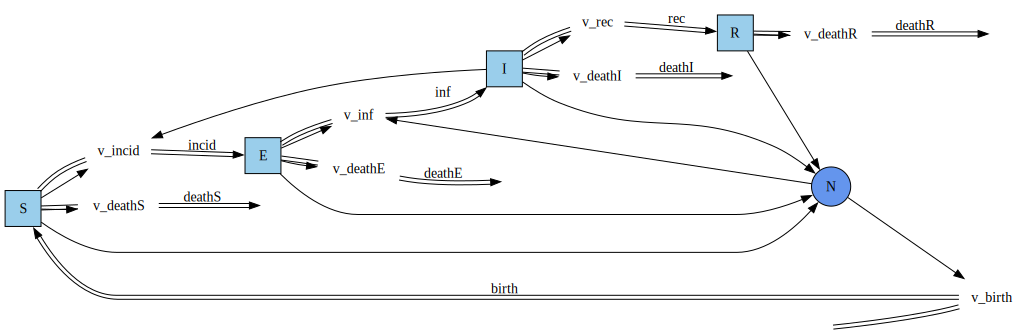

In [4]:
Graph(seir)

# 2. Convert the Stock and Flow diagram to Causal Loop diagram

In [5]:
seir_causalLoop=convertToCausalLoop(seir)

V,vname
1,S
2,E
3,I
4,R
5,birth
6,incid
7,inf
8,rec
9,deathS
10,deathE


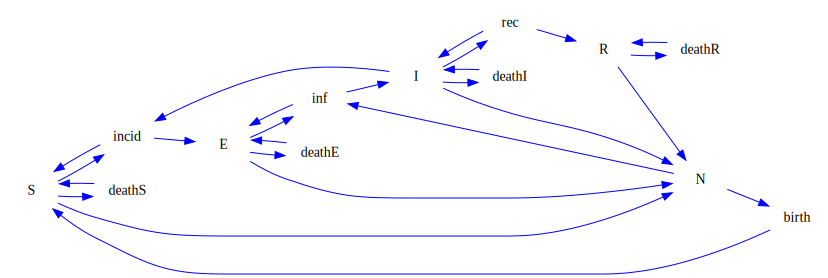

In [6]:
GraphCL(seir_causalLoop)